In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_context('talk')

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt

In [48]:
df_costs = pd.read_csv("sim_data_full_with_costs_corrected.csv")
df_costs = df_costs[["archetype", "transmission_level", "scenario_number", "mean", "std", "mean_iptsc", "std_iptsc"]]
df_costs.rename(columns={"mean": "cost_mean", "std": "cost_std", "mean_iptsc": "cost_IPTsc_mean", "std_iptsc": "cost_IPTsc_std"}, inplace=True)

df_raw = pd.read_csv("sim_data_raw.csv")
df_raw = df_raw[["archetype", "transmission_level", "scenario_number", "clinical_incidence_all"]]
df_raw["cases"] = df_raw["clinical_incidence_all"]*5000
# Get mean and stdev of cases
df_cases = df_raw.groupby(["archetype", "transmission_level", "scenario_number"]).agg({"cases": ["mean", "std"]}).reset_index()
df = pd.merge(df_costs, df_cases, on=["archetype", "transmission_level", "scenario_number"])

df_scenarios = pd.read_csv("../../run_sims/Assets/scenario_master_list.csv")
df = pd.merge(df, df_scenarios[["archetype", "scenario_number", "comments"]], on=["archetype", "scenario_number"])

C:\Users\joshsu\AppData\Local\Temp\ipykernel_31688\2390756690.py:10: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df = pd.merge(df_costs, df_cases, on=["archetype", "transmission_level", "scenario_number"])
C:\Users\joshsu\AppData\Local\Temp\ipykernel_31688\2390756690.py:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = pd.merge(df_costs, df_cases, on=["archetype", "transmission_level", "scenario_number"])


In [49]:
df.rename(columns={("cases", "mean"): "cases_mean",
                   ("cases", "std"): "cases_std"}, inplace=True)
df

,archetype,transmission_level,scenario_number,cost_mean,cost_std,cost_IPTsc_mean,cost_IPTsc_std,cases_mean,cases_std,comments
0,Central,0.05,0,16107.653428,2112.155014,0.000000,0.000000,6029.420900,170.098339,No IPTsc
1,Central,0.10,0,16515.819897,2174.179624,0.000000,0.000000,5939.191469,153.868286,No IPTsc
2,Central,0.20,0,21151.487610,2955.514287,0.000000,0.000000,6684.382831,103.193884,No IPTsc
3,Central,0.30,0,24133.977951,3471.043854,0.000000,0.000000,6975.190576,88.880312,No IPTsc
4,Central,0.40,0,27399.536886,4047.100109,0.000000,0.000000,7159.926498,83.860444,No IPTsc
...,...,...,...,...,...,...,...,...,...,...
110,Southern,0.05,9,31497.642850,1577.132396,24433.589585,1395.134212,1085.255048,382.213400,DP month
111,Southern,0.10,9,33669.009610,1685.831198,24961.744690,1422.768009,1795.228737,295.557103,DP month
112,Southern,0.20,9,36763.521875,1988.693654,24593.254650,1410.140965,2567.773054,150.665002,DP month
113,Southern,0.30,9,42242.570439,2623.540358,25484.615916,1458.115294,3593.362750,107.524129,DP month


In [50]:
df.to_csv("costs_and_cases.csv", index=False)

# Outputs
- Cost plane figure
- League table

In [51]:
# ITN cost for higher coverage: 20% higher coverage of 5000 people
total_cost = 0.2*5000*2.48/2 # Factor of 2 accounts for the fact that the IPTsc has to be done every year, while the ITN distribution was only done in the first year
# print(total_cost)
itn_cost_per_1k = total_cost/5
print(itn_cost_per_1k)

248.0


In [52]:
# Update labels
df.loc[df["scenario_number"] == 5, "comments"] = "Higher ITN coverage"
df.loc[df["scenario_number"] == 8, "comments"] = "DP each term"
df.loc[df["scenario_number"] == 9, "comments"] = "DP each month"
df.loc[df["scenario_number"] == 30, "comments"] = "u10 SMC with SPAQ"
df.loc[df["scenario_number"] == 31, "comments"] = "u15 SMC with SPAQ"
df.loc[df["scenario_number"] == 32, "comments"] = "u10 SMC with DP"
df.loc[df["scenario_number"] == 33, "comments"] = "u15 SMC with DP"

# Scenarios 6 and 7 have different comments depending on archetype - Southern and Central are same, Sahel is different
df.loc[(df["scenario_number"] == 6) & (df["archetype"] == "Southern"), "comments"] = "ASAQ each term"
df.loc[(df["scenario_number"] == 6) & (df["archetype"] == "Central"), "comments"] = "ASAQ each term"
df.loc[(df["scenario_number"] == 6) & (df["archetype"] == "Sahel"), "comments"] = "SPAQ each term"

df.loc[(df["scenario_number"] == 7) & (df["archetype"] == "Southern"), "comments"] = "ASAQ each month"
df.loc[(df["scenario_number"] == 7) & (df["archetype"] == "Central"), "comments"] = "ASAQ each month"
df.loc[(df["scenario_number"] == 7) & (df["archetype"] == "Sahel"), "comments"] = "SPAQ each month"


meta NOT subset; don't know how to subset; dropped


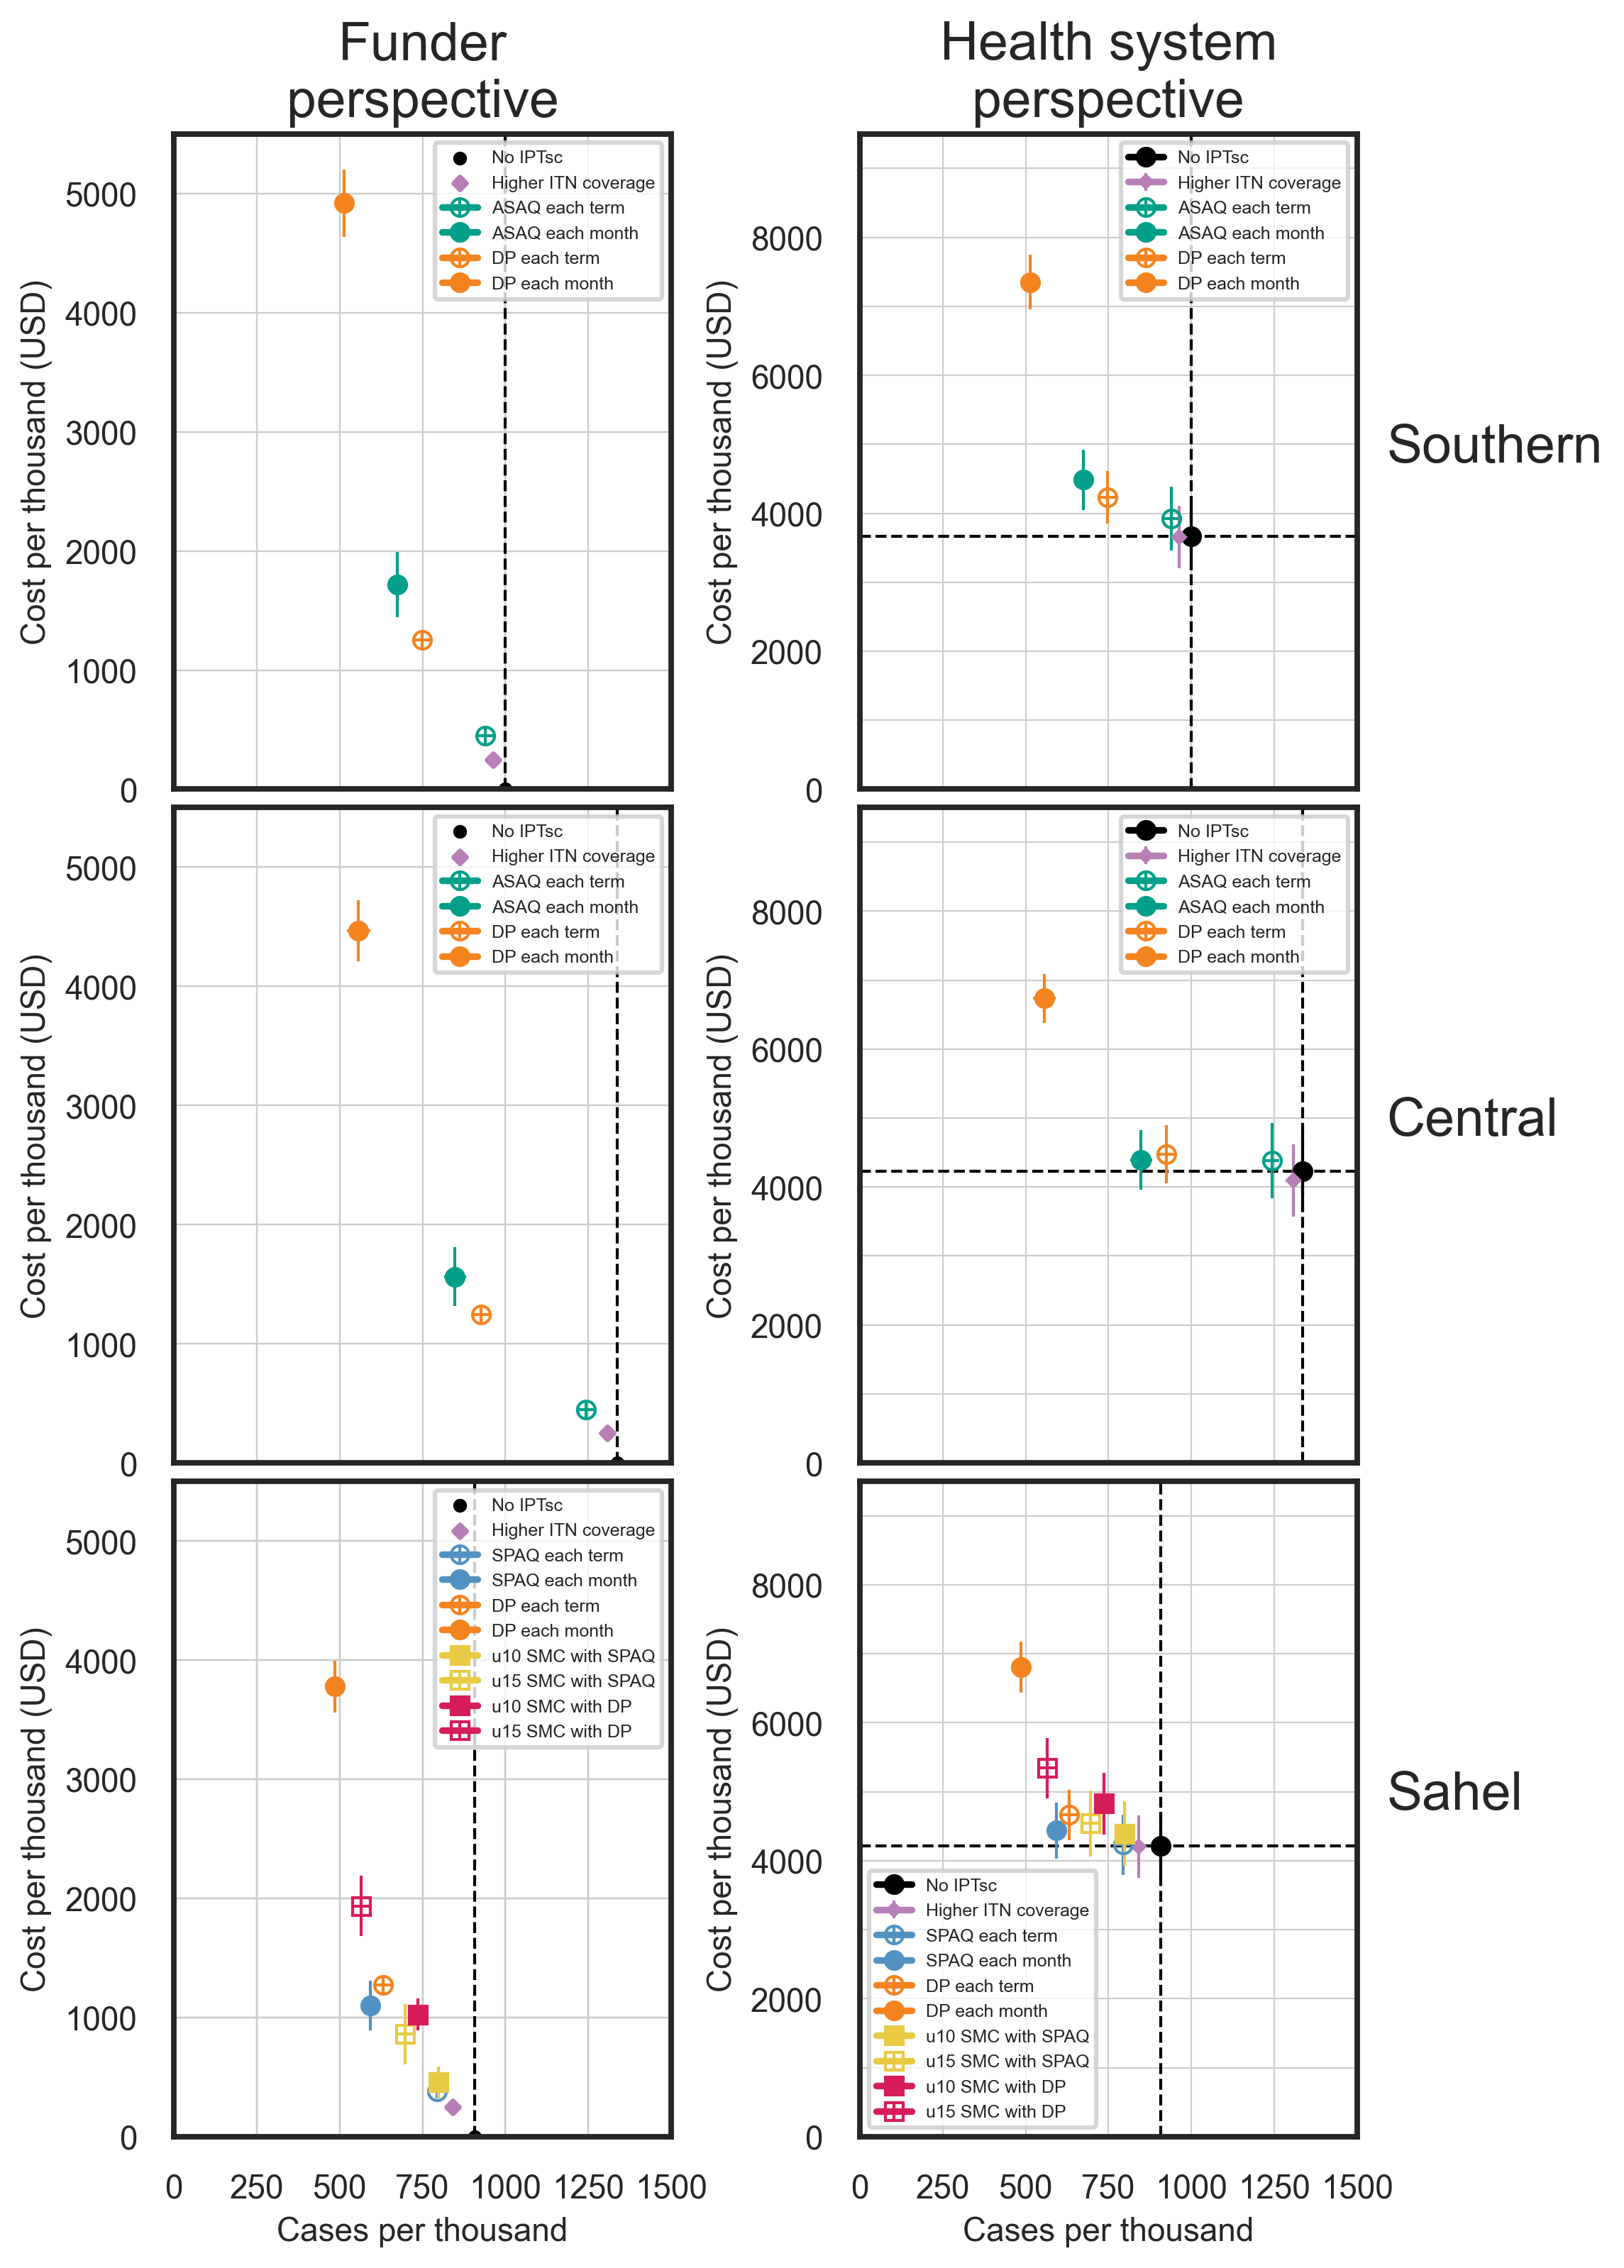

In [76]:
df_plot = df[df["transmission_level"] == 0.2]

sns.set_style("white")

archetype_list = ["Southern", "Central", "Sahel"]

scenarios_to_plot = {"Southern": [0, 5, 6, 7, 8, 9], 
                     "Central": [0, 5, 6, 7, 8, 9], 
                     "Sahel": [0, 5, 6, 7, 8, 9, 30, 31, 32, 33]}

school_marker = "o"
smc_marker = "s"
marker_dict = {i: school_marker for i in [6,7,8,9,10]}
marker_dict.update({i: smc_marker for i in [30,31,32,33]})
marker_dict[0] = "o"

color_dict = {
    "Southern":
        {
            0: "black",
            5: "#B87FB7",
            6: "#009F89",
            7: "#009F89",
            8: "#F48420",
            9: "#F48420"
        },
    "Central":
        {
            0: "black",
            5: "#B87FB7",
            6: "#009F89",
            7: "#009F89",
            8: "#F48420",
            9: "#F48420"
        },
    "Sahel":
        {
            0: "black",
            5: "#B87FB7",
            6: "#5292C2",
            7: "#5292C2",
            8: "#F48420",
            9: "#F48420",
            30: "#E9CA43",
            31: "#E9CA43",
            32: "#D61C5B",
            33: "#D61C5B"
        }
}
case_xmax = 1500

fontsize_title = 18
fontsize_else = 11
fontsize_legend = 6

plt.figure(figsize=(8,11), dpi=300)
for i in np.arange(3):
    # print(i)
    archetype = archetype_list[i]
    df_single = df_plot[df_plot['archetype'] == archetype]
    
    # fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    for j in [0,1]:
        plt.subplot(3, 2, i*2+j+1)

        if j == 0:
            # Funder perspective
            # Iterate over scenarios
            for s, sdf in df_single.groupby("scenario_number"):
                l = sdf["comments"].values[0]
                # Extra ITN scenario (scenario 5)
                if s == 5:
                    # marker is black diamond, small size
                    plt.scatter(x=sdf["cases_mean"]/5, y=itn_cost_per_1k, label=l, marker='D', color=color_dict[archetype][s], s=10)
                    continue
                if s not in scenarios_to_plot[archetype]:
                    continue
                if s == 0:
                    plt.scatter(x=sdf["cases_mean"]/5, y=sdf["cost_IPTsc_mean"]/5, label="No IPTsc", marker='o', color=color_dict[archetype][s], s=10)
                    plt.axvline(x=sdf["cases_mean"].values[0]/5, color=color_dict[archetype][s], linestyle='--', lw=1)
                    continue
                
                if s in [7,9, 30, 32]:
                    plt.errorbar(x=sdf["cases_mean"]/5,
                                 y=sdf["cost_IPTsc_mean"]/5,
                                 xerr=sdf["cases_std"]/5,
                                 yerr=sdf["cost_IPTsc_std"]/5,
                                 label=l,
                                 color=color_dict[archetype][s],
                                 marker=marker_dict[s],
                                 markersize=6,
                                 elinewidth=1,
                                 zorder=10)
                elif s in [6,8, 31, 33]:
                    plt.errorbar(x=sdf["cases_mean"]/5,
                                 y=sdf["cost_IPTsc_mean"]/5,
                                 xerr=sdf["cases_std"]/5,
                                 yerr=sdf["cost_IPTsc_std"]/5,
                                 label=l,
                                 color=color_dict[archetype][s],
                                 marker=marker_dict[s],
                                 markersize=6,
                                 elinewidth=1,
                                 markerfacecolor='none',
                                 zorder=10)
                if i == 0:
                    plt.title("Funder\nperspective", fontsize=fontsize_title)
                
                
                
                plt.axvline(1250, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axvline(1000, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axvline(750, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axvline(500, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axvline(250, c="#CCCCCB", zorder=0, lw=0.5)
                
                plt.axhline(1000, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axhline(2000, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axhline(3000, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axhline(4000, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axhline(5000, c="#CCCCCB", zorder=0, lw=0.5)
                
                plt.legend(fontsize=fontsize_legend, loc='upper right')
                
                # Turn off x-axis labels for all but the bottom row
                if i == 2:
                    plt.xlabel("Cases per thousand", fontsize=fontsize_else)
                    plt.xticks([0, 250, 500, 750, 1000, 1250, 1500], fontsize=fontsize_else)
                else:
                    plt.xlabel(None)
                    plt.xticks([])
                
                plt.ylabel("Cost per thousand (USD)", fontsize=fontsize_else)
                plt.xlim([0,case_xmax])
                plt.ylim([0,5500])
                plt.yticks(fontsize=fontsize_else)
                

                
            
        elif j == 1:
            # Health system perspective
            for s, sdf in df_single.groupby("scenario_number"):
                if s not in scenarios_to_plot[archetype]:
                    continue
                l = sdf["comments"].values[0]
                if s == 0:
                    plt.axhline(y=sdf["cost_mean"].values[0]/5, color=color_dict[archetype][s], linestyle='--', lw=1)
                    plt.axvline(x=sdf["cases_mean"].values[0]/5, color=color_dict[archetype][s], linestyle='--', lw=1)
                    
                if s == 5:
                    plt.errorbar(x=sdf["cases_mean"]/5, y=sdf["cost_mean"]/5, yerr=sdf["cost_std"]/5, label=l, marker='D', color=color_dict[archetype][s], markersize=3, elinewidth=1)
                    continue
                    
                if s in [0,7,9, 30, 32]:
                    plt.errorbar(x=sdf["cases_mean"]/5,
                                 y=sdf["cost_mean"]/5,
                                 xerr=sdf["cases_std"]/5,
                                 yerr=sdf["cost_std"]/5,
                                 color=color_dict[archetype][s],
                                 marker=marker_dict[s],
                                 elinewidth=1,
                                 markersize=6,
                                 label=l)
                elif s in [6,8, 31, 33]:
                    plt.errorbar(x=sdf["cases_mean"]/5,
                                 y=sdf["cost_mean"]/5,
                                 xerr=sdf["cases_std"]/5,
                                 yerr=sdf["cost_std"]/5,
                                 color=color_dict[archetype][s],
                                 marker=marker_dict[s],
                                 elinewidth=1,
                                 markersize=6,
                                 label=l,
                                 markerfacecolor='none')
                    
                if i == 0:
                    plt.title("Health system\nperspective", fontsize=fontsize_title)
                if i == 2:
                    plt.xlabel("Cases per thousand", fontsize=fontsize_else)
                else:
                    plt.xlabel(None)
                
                plt.ylabel("Cost per thousand (USD)", fontsize=fontsize_else)
            plt.xlim([0,case_xmax])
            if i == 2:
                plt.xticks([0, 250, 500, 750, 1000, 1250, 1500], fontsize=fontsize_else)
            else:
                plt.xticks([])
            plt.axvline(1250, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axvline(1000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axvline(750, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axvline(500, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axvline(250, c="#CCCCCB", zorder=0, lw=0.5)
            plt.ylim([0,9500])

            plt.axhline(1000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(2000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(3000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(4000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(5000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(6000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(7000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(8000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(9000, c="#CCCCCB", zorder=0, lw=0.5)

            if archetype == "Sahel":
                plt.legend(fontsize=fontsize_legend, loc='lower left')
            else:
                plt.legend(fontsize=fontsize_legend, loc='upper right')

            plt.text(case_xmax*1.06,9500/2,archetype, fontsize=fontsize_title)
            plt.yticks(fontsize=fontsize_else)
        
    
        # sns.scatterplot(x="cost_mean", y="clinical_incidence_all", hue="scenario_number", data=df_single, ax=ax[0])
        # sns.scatterplot(x="cost_mean", y="clinical_incidence_all", hue="scenario_number", data=df_single, ax=ax[1])
        # 
        # ax[0].set_title("Funder perspective")
        # ax[1].set_title("Health system perspective")
        
plt.tight_layout(h_pad=0, w_pad=0)
plt.savefig(f"cost_plane_pfpr20_v3.png")
plt.savefig("cost_plane_pfpr20_v3.pdf")
plt.show()

# Supplemental figures: same as above, but at 5% and 40% transmission levels

meta NOT subset; don't know how to subset; dropped


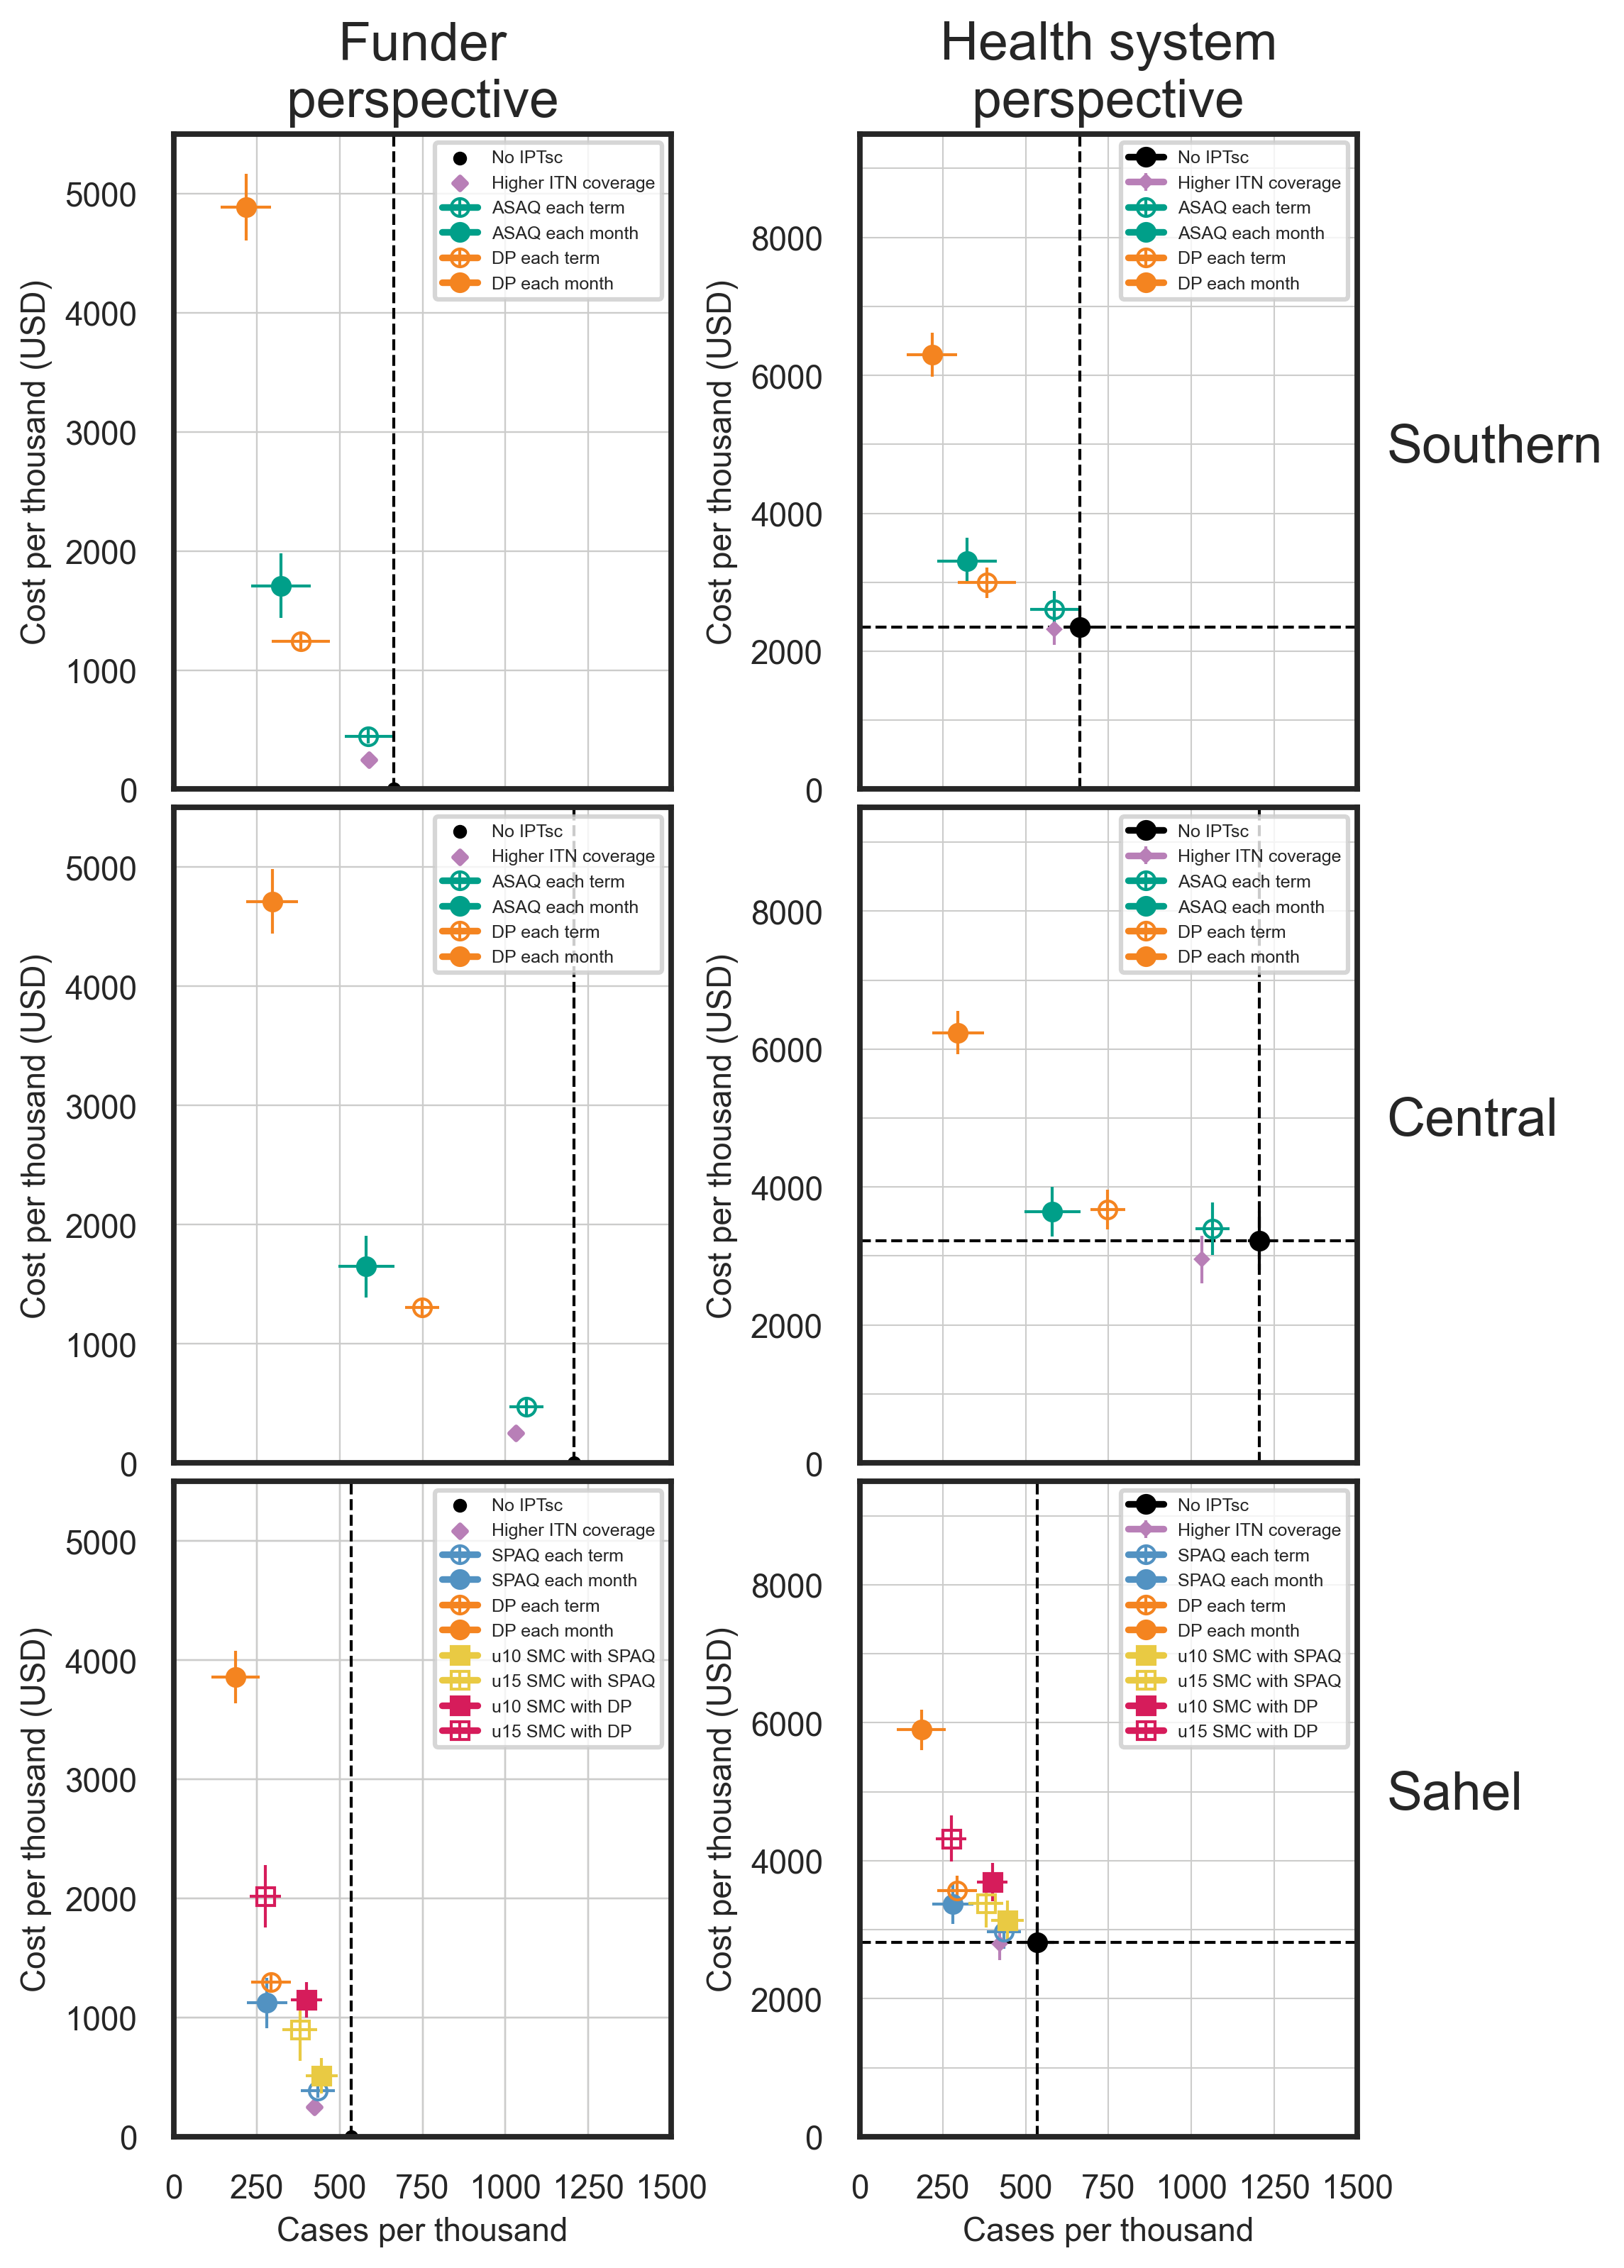

In [77]:
df_plot = df[df["transmission_level"] == 0.05]

sns.set_style("white")

archetype_list = ["Southern", "Central", "Sahel"]

scenarios_to_plot = {"Southern": [0, 5, 6, 7, 8, 9], 
                     "Central": [0, 5, 6, 7, 8, 9], 
                     "Sahel": [0, 5, 6, 7, 8, 9, 30, 31, 32, 33]}

school_marker = "o"
smc_marker = "s"
marker_dict = {i: school_marker for i in [6,7,8,9,10]}
marker_dict.update({i: smc_marker for i in [30,31,32,33]})
marker_dict[0] = "o"

color_dict = {
    "Southern":
        {
            0: "black",
            5: "#B87FB7",
            6: "#009F89",
            7: "#009F89",
            8: "#F48420",
            9: "#F48420"
        },
    "Central":
        {
            0: "black",
            5: "#B87FB7",
            6: "#009F89",
            7: "#009F89",
            8: "#F48420",
            9: "#F48420"
        },
    "Sahel":
        {
            0: "black",
            5: "#B87FB7",
            6: "#5292C2",
            7: "#5292C2",
            8: "#F48420",
            9: "#F48420",
            30: "#E9CA43",
            31: "#E9CA43",
            32: "#D61C5B",
            33: "#D61C5B"
        }
}
case_xmax = 1500

fontsize_title = 18
fontsize_else = 11
fontsize_legend = 6

plt.close('all')
plt.figure(figsize=(8,11), dpi=300)
for i in np.arange(3):
    # print(i)
    archetype = archetype_list[i]
    df_single = df_plot[df_plot['archetype'] == archetype]
    
    # fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    for j in [0,1]:
        plt.subplot(3, 2, i*2+j+1)

        if j == 0:
            # Funder perspective
            # Iterate over scenarios
            for s, sdf in df_single.groupby("scenario_number"):
                l = sdf["comments"].values[0]
                # Extra ITN scenario (scenario 5)
                if s == 5:
                    # marker is black diamond, small size
                    plt.scatter(x=sdf["cases_mean"]/5, y=itn_cost_per_1k, label=l, marker='D', color=color_dict[archetype][s], s=10)
                    continue
                if s not in scenarios_to_plot[archetype]:
                    continue
                if s == 0:
                    plt.scatter(x=sdf["cases_mean"]/5, y=sdf["cost_IPTsc_mean"]/5, label="No IPTsc", marker='o', color=color_dict[archetype][s], s=10)
                    plt.axvline(x=sdf["cases_mean"].values[0]/5, color=color_dict[archetype][s], linestyle='--', lw=1)
                    continue
                
                if s in [7,9, 30, 32]:
                    plt.errorbar(x=sdf["cases_mean"]/5,
                                 y=sdf["cost_IPTsc_mean"]/5,
                                 xerr=sdf["cases_std"]/5,
                                 yerr=sdf["cost_IPTsc_std"]/5,
                                 label=l,
                                 color=color_dict[archetype][s],
                                 marker=marker_dict[s],
                                 markersize=6,
                                 elinewidth=1,
                                 zorder=10)
                elif s in [6,8, 31, 33]:
                    plt.errorbar(x=sdf["cases_mean"]/5,
                                 y=sdf["cost_IPTsc_mean"]/5,
                                 xerr=sdf["cases_std"]/5,
                                 yerr=sdf["cost_IPTsc_std"]/5,
                                 label=l,
                                 color=color_dict[archetype][s],
                                 marker=marker_dict[s],
                                 markersize=6,
                                 elinewidth=1,
                                 markerfacecolor='none',
                                 zorder=10)
                if i == 0:
                    plt.title("Funder\nperspective", fontsize=fontsize_title)
                
                
                
                plt.axvline(1250, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axvline(1000, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axvline(750, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axvline(500, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axvline(250, c="#CCCCCB", zorder=0, lw=0.5)
                
                plt.axhline(1000, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axhline(2000, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axhline(3000, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axhline(4000, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axhline(5000, c="#CCCCCB", zorder=0, lw=0.5)
                
                plt.legend(fontsize=fontsize_legend, loc='upper right')
                
                # Turn off x-axis labels for all but the bottom row
                if i == 2:
                    plt.xlabel("Cases per thousand", fontsize=fontsize_else)
                    plt.xticks([0, 250, 500, 750, 1000, 1250, 1500], fontsize=fontsize_else)
                else:
                    plt.xlabel(None)
                    plt.xticks([])
                
                plt.ylabel("Cost per thousand (USD)", fontsize=fontsize_else)
                plt.xlim([0,case_xmax])
                plt.ylim([0,5500])
                plt.yticks(fontsize=fontsize_else)
                

                
            
        elif j == 1:
            # Health system perspective
            for s, sdf in df_single.groupby("scenario_number"):
                if s not in scenarios_to_plot[archetype]:
                    continue
                l = sdf["comments"].values[0]
                if s == 0:
                    plt.axhline(y=sdf["cost_mean"].values[0]/5, color=color_dict[archetype][s], linestyle='--', lw=1)
                    plt.axvline(x=sdf["cases_mean"].values[0]/5, color=color_dict[archetype][s], linestyle='--', lw=1)
                    
                if s == 5:
                    plt.errorbar(x=sdf["cases_mean"]/5, y=sdf["cost_mean"]/5, yerr=sdf["cost_std"]/5, label=l, marker='D', color=color_dict[archetype][s], markersize=3, elinewidth=1)
                    continue
                    
                if s in [0,7,9, 30, 32]:
                    plt.errorbar(x=sdf["cases_mean"]/5,
                                 y=sdf["cost_mean"]/5,
                                 xerr=sdf["cases_std"]/5,
                                 yerr=sdf["cost_std"]/5,
                                 color=color_dict[archetype][s],
                                 marker=marker_dict[s],
                                 elinewidth=1,
                                 markersize=6,
                                 label=l)
                elif s in [6,8, 31, 33]:
                    plt.errorbar(x=sdf["cases_mean"]/5,
                                 y=sdf["cost_mean"]/5,
                                 xerr=sdf["cases_std"]/5,
                                 yerr=sdf["cost_std"]/5,
                                 color=color_dict[archetype][s],
                                 marker=marker_dict[s],
                                 elinewidth=1,
                                 markersize=6,
                                 label=l,
                                 markerfacecolor='none')
                    
                if i == 0:
                    plt.title("Health system\nperspective", fontsize=fontsize_title)
                if i == 2:
                    plt.xlabel("Cases per thousand", fontsize=fontsize_else)
                else:
                    plt.xlabel(None)
                
                plt.ylabel("Cost per thousand (USD)", fontsize=fontsize_else)
            plt.xlim([0,case_xmax])
            if i == 2:
                plt.xticks([0, 250, 500, 750, 1000, 1250, 1500], fontsize=fontsize_else)
            else:
                plt.xticks([])
            plt.axvline(1250, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axvline(1000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axvline(750, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axvline(500, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axvline(250, c="#CCCCCB", zorder=0, lw=0.5)
            plt.ylim([0,9500])

            plt.axhline(1000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(2000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(3000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(4000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(5000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(6000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(7000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(8000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(9000, c="#CCCCCB", zorder=0, lw=0.5)

            plt.legend(fontsize=fontsize_legend, loc='upper right')

            plt.text(case_xmax*1.06,9500/2,archetype, fontsize=fontsize_title)
            plt.yticks(fontsize=fontsize_else)
        
    
        # sns.scatterplot(x="cost_mean", y="clinical_incidence_all", hue="scenario_number", data=df_single, ax=ax[0])
        # sns.scatterplot(x="cost_mean", y="clinical_incidence_all", hue="scenario_number", data=df_single, ax=ax[1])
        # 
        # ax[0].set_title("Funder perspective")
        # ax[1].set_title("Health system perspective")
        
plt.tight_layout(h_pad=0, w_pad=0)
plt.savefig(f"cost_plane_pfpr05_v3.png")
plt.savefig("cost_plane_pfpr05_v3.pdf")
plt.show()

meta NOT subset; don't know how to subset; dropped


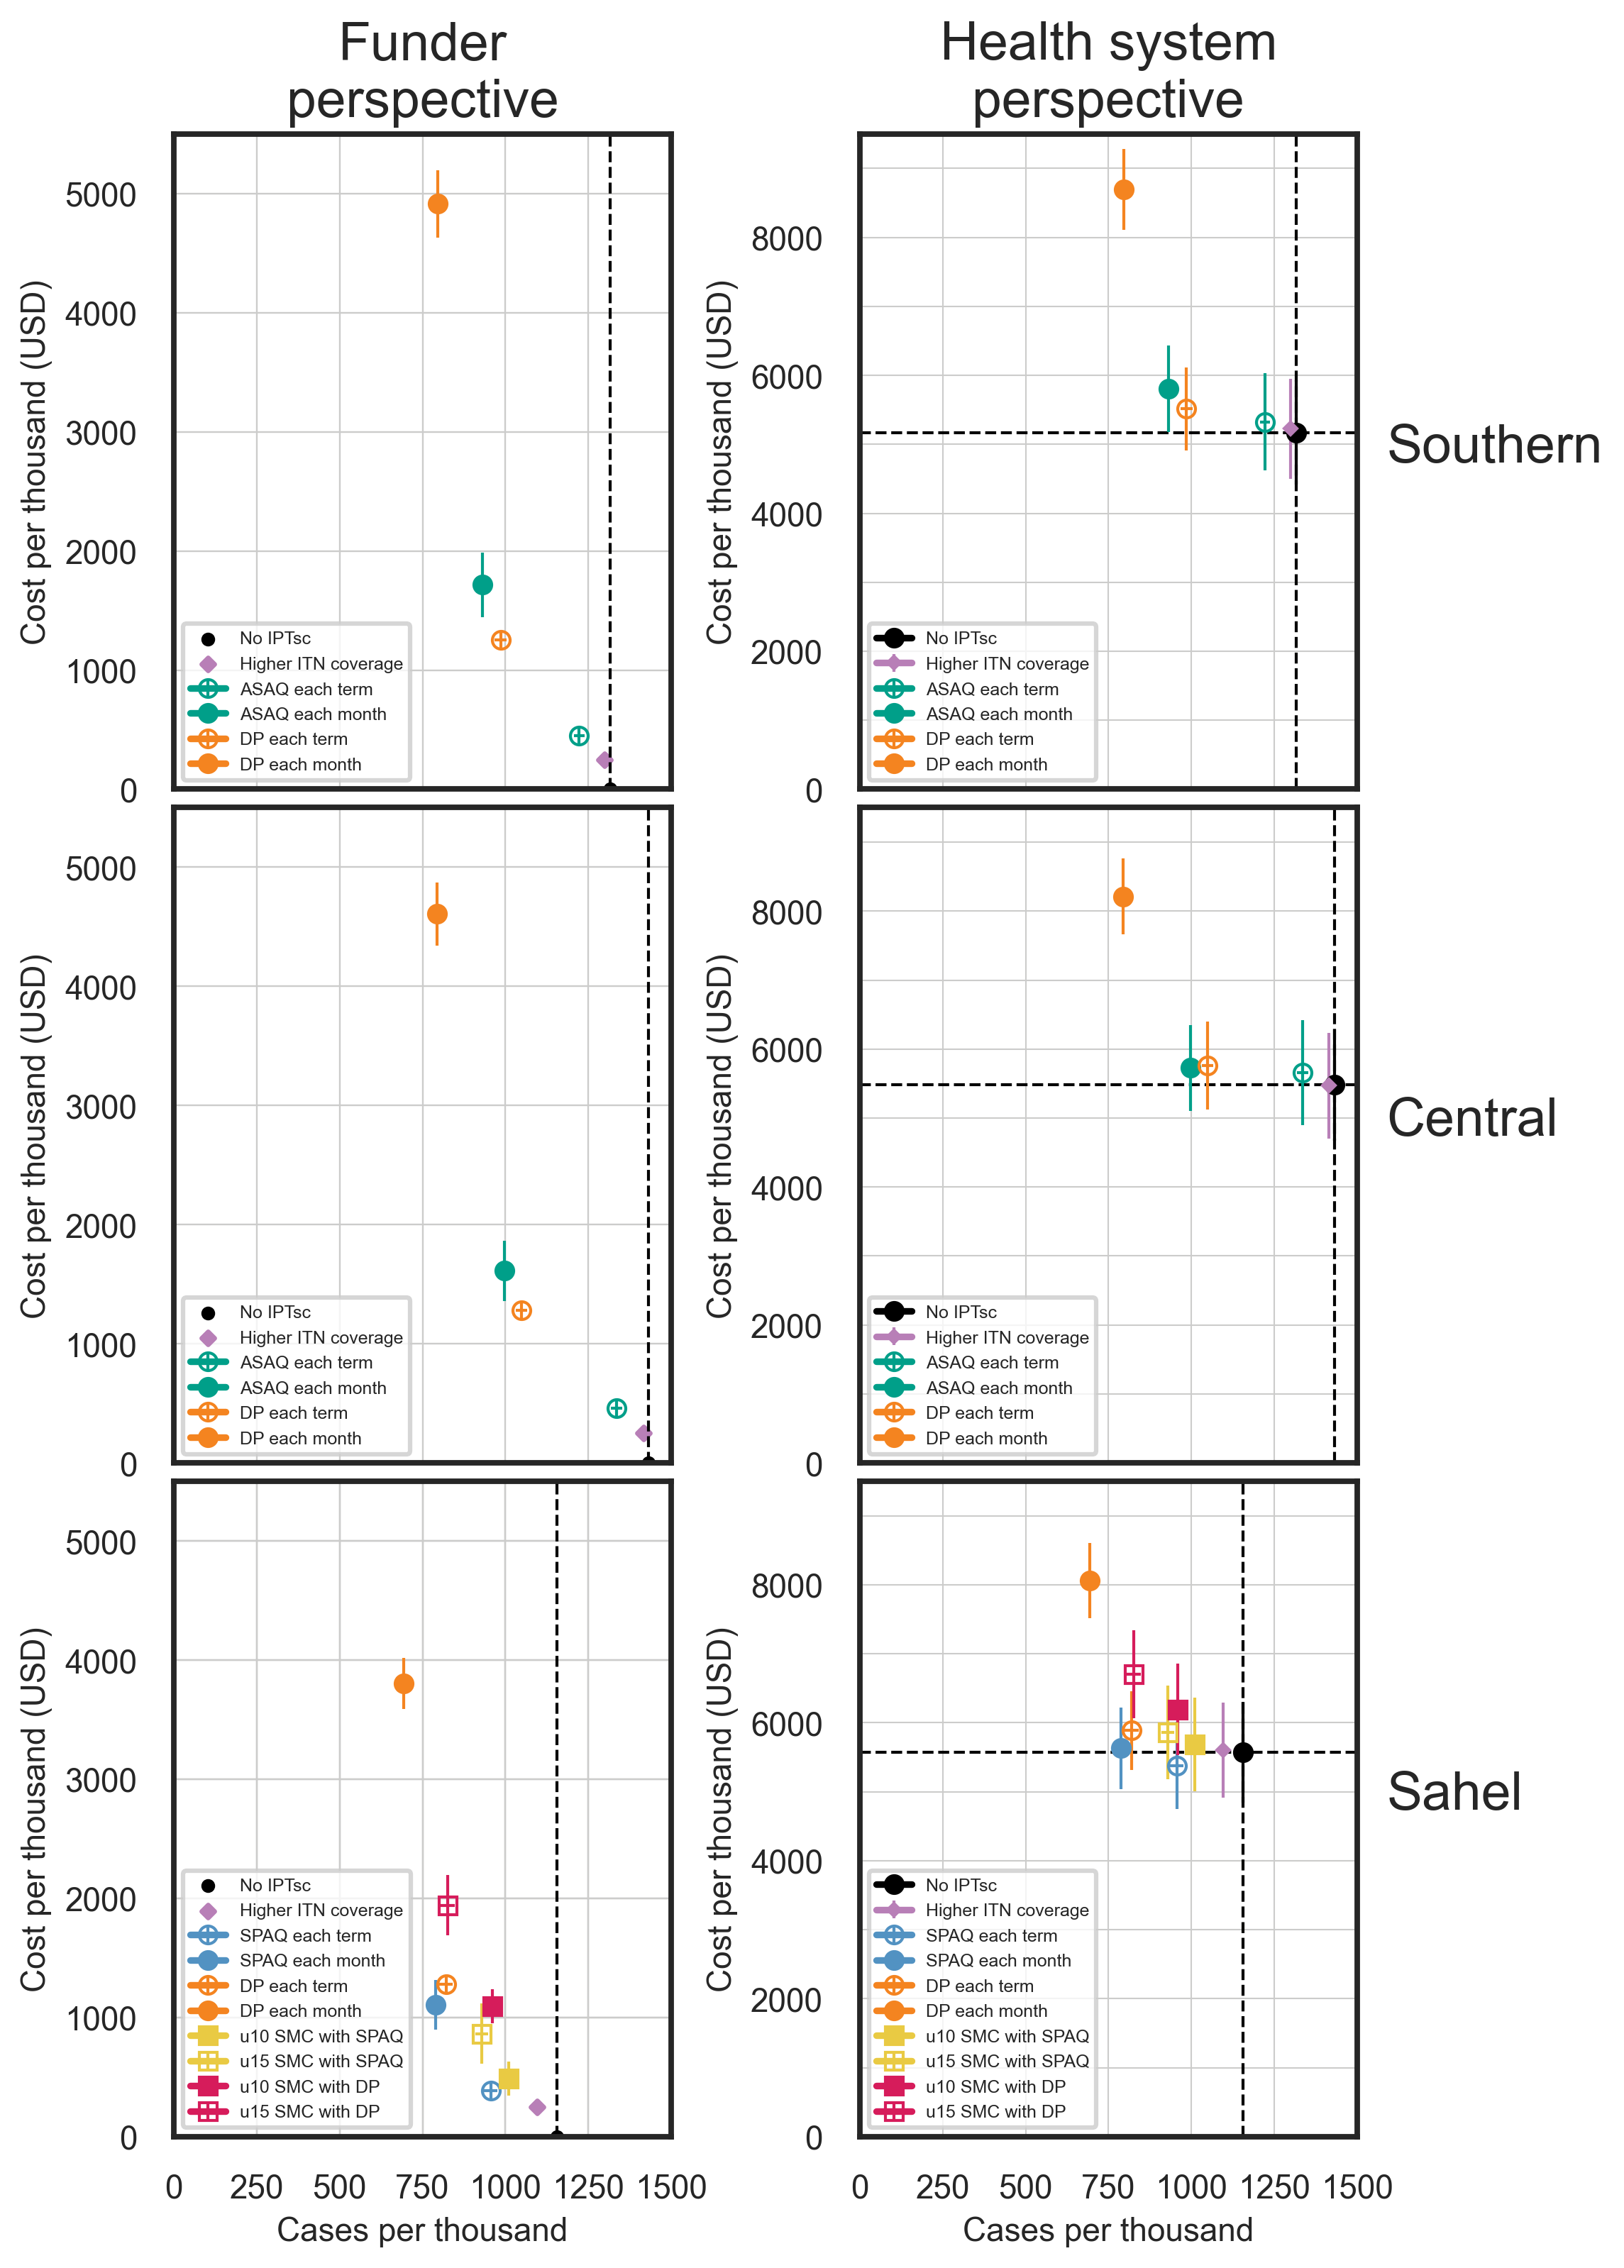

In [73]:
df_plot = df[df["transmission_level"] == 0.4]

sns.set_style("white")

archetype_list = ["Southern", "Central", "Sahel"]

scenarios_to_plot = {"Southern": [0, 5, 6, 7, 8, 9], 
                     "Central": [0, 5, 6, 7, 8, 9], 
                     "Sahel": [0, 5, 6, 7, 8, 9, 30, 31, 32, 33]}

school_marker = "o"
smc_marker = "s"
marker_dict = {i: school_marker for i in [6,7,8,9,10]}
marker_dict.update({i: smc_marker for i in [30,31,32,33]})
marker_dict[0] = "o"

color_dict = {
    "Southern":
        {
            0: "black",
            5: "#B87FB7",
            6: "#009F89",
            7: "#009F89",
            8: "#F48420",
            9: "#F48420"
        },
    "Central":
        {
            0: "black",
            5: "#B87FB7",
            6: "#009F89",
            7: "#009F89",
            8: "#F48420",
            9: "#F48420"
        },
    "Sahel":
        {
            0: "black",
            5: "#B87FB7",
            6: "#5292C2",
            7: "#5292C2",
            8: "#F48420",
            9: "#F48420",
            30: "#E9CA43",
            31: "#E9CA43",
            32: "#D61C5B",
            33: "#D61C5B"
        }
}
case_xmax = 1500

fontsize_title = 18
fontsize_else = 11
fontsize_legend = 6

plt.close('all')
plt.figure(figsize=(8,11), dpi=300)
for i in np.arange(3):
    # print(i)
    archetype = archetype_list[i]
    df_single = df_plot[df_plot['archetype'] == archetype]
    
    # fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    for j in [0,1]:
        plt.subplot(3, 2, i*2+j+1)

        if j == 0:
            # Funder perspective
            # Iterate over scenarios
            for s, sdf in df_single.groupby("scenario_number"):
                l = sdf["comments"].values[0]
                # Extra ITN scenario (scenario 5)
                if s == 5:
                    # marker is black diamond, small size
                    plt.scatter(x=sdf["cases_mean"]/5, y=itn_cost_per_1k, label=l, marker='D', color=color_dict[archetype][s], s=10)
                    continue
                if s not in scenarios_to_plot[archetype]:
                    continue
                if s == 0:
                    plt.scatter(x=sdf["cases_mean"]/5, y=sdf["cost_IPTsc_mean"]/5, label="No IPTsc", marker='o', color=color_dict[archetype][s], s=10)
                    plt.axvline(x=sdf["cases_mean"].values[0]/5, color=color_dict[archetype][s], linestyle='--', lw=1)
                    continue
                
                if s in [7,9, 30, 32]:
                    plt.errorbar(x=sdf["cases_mean"]/5,
                                 y=sdf["cost_IPTsc_mean"]/5,
                                 xerr=sdf["cases_std"]/5,
                                 yerr=sdf["cost_IPTsc_std"]/5,
                                 label=l,
                                 color=color_dict[archetype][s],
                                 marker=marker_dict[s],
                                 markersize=6,
                                 elinewidth=1,
                                 zorder=10)
                elif s in [6,8, 31, 33]:
                    plt.errorbar(x=sdf["cases_mean"]/5,
                                 y=sdf["cost_IPTsc_mean"]/5,
                                 xerr=sdf["cases_std"]/5,
                                 yerr=sdf["cost_IPTsc_std"]/5,
                                 label=l,
                                 color=color_dict[archetype][s],
                                 marker=marker_dict[s],
                                 markersize=6,
                                 elinewidth=1,
                                 markerfacecolor='none',
                                 zorder=10)
                if i == 0:
                    plt.title("Funder\nperspective", fontsize=fontsize_title)
                
                
                
                plt.axvline(1250, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axvline(1000, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axvline(750, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axvline(500, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axvline(250, c="#CCCCCB", zorder=0, lw=0.5)
                
                plt.axhline(1000, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axhline(2000, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axhline(3000, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axhline(4000, c="#CCCCCB", zorder=0, lw=0.5)
                plt.axhline(5000, c="#CCCCCB", zorder=0, lw=0.5)
                
                plt.legend(fontsize=fontsize_legend, loc='lower left')
                
                # Turn off x-axis labels for all but the bottom row
                if i == 2:
                    plt.xlabel("Cases per thousand", fontsize=fontsize_else)
                    plt.xticks([0, 250, 500, 750, 1000, 1250, 1500], fontsize=fontsize_else)
                else:
                    plt.xlabel(None)
                    plt.xticks([])
                
                plt.ylabel("Cost per thousand (USD)", fontsize=fontsize_else)
                plt.xlim([0,case_xmax])
                plt.ylim([0,5500])
                plt.yticks(fontsize=fontsize_else)
                

                
            
        elif j == 1:
            # Health system perspective
            for s, sdf in df_single.groupby("scenario_number"):
                if s not in scenarios_to_plot[archetype]:
                    continue
                l = sdf["comments"].values[0]
                if s == 0:
                    plt.axhline(y=sdf["cost_mean"].values[0]/5, color=color_dict[archetype][s], linestyle='--', lw=1)
                    plt.axvline(x=sdf["cases_mean"].values[0]/5, color=color_dict[archetype][s], linestyle='--', lw=1)
                    
                if s == 5:
                    plt.errorbar(x=sdf["cases_mean"]/5, y=sdf["cost_mean"]/5, yerr=sdf["cost_std"]/5, label=l, marker='D', color=color_dict[archetype][s], markersize=3, elinewidth=1)
                    continue
                    
                if s in [0,7,9, 30, 32]:
                    plt.errorbar(x=sdf["cases_mean"]/5,
                                 y=sdf["cost_mean"]/5,
                                 xerr=sdf["cases_std"]/5,
                                 yerr=sdf["cost_std"]/5,
                                 color=color_dict[archetype][s],
                                 marker=marker_dict[s],
                                 elinewidth=1,
                                 markersize=6,
                                 label=l)
                elif s in [6,8, 31, 33]:
                    plt.errorbar(x=sdf["cases_mean"]/5,
                                 y=sdf["cost_mean"]/5,
                                 xerr=sdf["cases_std"]/5,
                                 yerr=sdf["cost_std"]/5,
                                 color=color_dict[archetype][s],
                                 marker=marker_dict[s],
                                 elinewidth=1,
                                 markersize=6,
                                 label=l,
                                 markerfacecolor='none')
                    
                if i == 0:
                    plt.title("Health system\nperspective", fontsize=fontsize_title)
                if i == 2:
                    plt.xlabel("Cases per thousand", fontsize=fontsize_else)
                else:
                    plt.xlabel(None)
                
                plt.ylabel("Cost per thousand (USD)", fontsize=fontsize_else)
            plt.xlim([0,case_xmax])
            if i == 2:
                plt.xticks([0, 250, 500, 750, 1000, 1250, 1500], fontsize=fontsize_else)
            else:
                plt.xticks([])
            plt.axvline(1250, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axvline(1000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axvline(750, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axvline(500, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axvline(250, c="#CCCCCB", zorder=0, lw=0.5)
            plt.ylim([0,9500])

            plt.axhline(1000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(2000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(3000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(4000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(5000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(6000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(7000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(8000, c="#CCCCCB", zorder=0, lw=0.5)
            plt.axhline(9000, c="#CCCCCB", zorder=0, lw=0.5)

            plt.legend(fontsize=fontsize_legend, loc='lower left')

            plt.text(case_xmax*1.06,9500/2,archetype, fontsize=fontsize_title)
            plt.yticks(fontsize=fontsize_else)
        
    
        # sns.scatterplot(x="cost_mean", y="clinical_incidence_all", hue="scenario_number", data=df_single, ax=ax[0])
        # sns.scatterplot(x="cost_mean", y="clinical_incidence_all", hue="scenario_number", data=df_single, ax=ax[1])
        # 
        # ax[0].set_title("Funder perspective")
        # ax[1].set_title("Health system perspective")
        
plt.tight_layout(h_pad=0, w_pad=0)
plt.savefig(f"cost_plane_pfpr40_v3.png")
plt.savefig("cost_plane_pfpr40_v3.pdf")
plt.show()

# Deeper dive on higher-ITN costs

In [56]:
foo = pd.read_csv("sim_data_full_with_costs_corrected.csv")

In [57]:
foo[(foo["archetype"] == "Southern") & (np.in1d(foo["scenario_number"],[5,6]))]

,archetype,transmission_level,scenario_number,mean,std,mean_iptsc,std_iptsc,mean_smc,std_smc,mean_facility,std_facility
86,Southern,0.05,5,11616.260127,1178.010697,0.000000,0.000000,0.0,0.0,6036.260127,1178.010697
87,Southern,0.05,6,13032.408969,1335.303942,2228.191844,309.337093,0.0,0.0,6464.217125,1300.359977
92,Southern,0.10,5,13612.944996,1447.144375,0.000000,0.000000,0.0,0.0,8032.944996,1447.144375
93,Southern,0.10,6,15319.098691,1595.213816,2280.395417,315.853993,0.0,0.0,8698.703274,1564.731787
98,Southern,0.20,5,18283.564824,2251.973771,0.000000,0.000000,0.0,0.0,12703.564824,2251.973771
99,Southern,0.20,6,19594.296256,2316.554815,2239.918985,310.902827,0.0,0.0,13014.377271,2295.962933
104,Southern,0.30,5,23828.095357,3206.039260,0.000000,0.000000,0.0,0.0,18248.095357,3206.039260
105,Southern,0.30,6,24870.515549,3215.873541,2327.309509,322.963081,0.0,0.0,18203.206040,3200.928801
110,Southern,0.40,5,26130.932442,3611.953989,0.000000,0.000000,0.0,0.0,20550.932442,3611.953989
111,Southern,0.40,6,26630.902515,3532.484619,2243.662048,311.024505,0.0,0.0,20047.240466,3518.707187


In [58]:
11427.842483-9177.842483

2250.0

In [59]:
13515.606913-11765.606913

1750.0

In [60]:
2250-1750

500

In [61]:
bar = df_raw[(df_raw["archetype"] == "Southern") & (np.in1d(df_raw["scenario_number"],[5,6])) & df_raw["transmission_level"].isin([0.05])]
bar.groupby("scenario_number").mean()

C:\Users\joshsu\AppData\Local\Temp\ipykernel_31688\2949795032.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bar.groupby("scenario_number").mean()


,transmission_level,clinical_incidence_all,cases
scenario_number,,,
5,0.05,0.587180,2935.897939
6,0.05,0.586508,2932.537656


In [62]:
df2 = pd.read_csv("sim_data_raw_with_cost_ranges.csv")

C:\Users\joshsu\AppData\Local\Temp\ipykernel_31688\3826491083.py:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("sim_data_raw_with_cost_ranges.csv")


In [63]:
df2.groupby(["archetype", "scenario_number"])["cost_facility_low"].mean()

archetype  scenario_number
Central    0                  18388.57136
           5                  16183.19104
           6                  16775.34720
           7                  10995.48760
           8                  13139.07048
           9                   8205.09272
Sahel      0                  14835.16432
           5                  13418.82232
           6                  12665.59144
           7                  10110.81512
           8                  10401.20704
           9                   8577.30568
           23                 13637.75304
           30                 13276.58696
           31                 12101.79376
           32                 12643.55192
           33                 10780.27232
Southern   0                  15758.13024
           5                  14423.47368
           6                  14609.40840
           7                  10782.56848
           8                  11794.01792
           9                   9220.46552
Name: c

In [64]:
df2.groupby(["archetype", "scenario_number"])["cost_facility_high"].mean()

archetype  scenario_number
Central    0                  48493.75456
           5                  42677.79584
           6                  44239.41120
           7                  28996.94960
           8                  34649.93808
           9                  21638.20912
Sahel      0                  39122.82272
           5                  35387.69072
           6                  33401.29424
           7                  26663.91952
           8                  27429.73184
           9                  22619.79728
           23                 35965.04784
           30                 35012.59216
           31                 31914.46496
           32                 33343.17232
           33                 28429.39072
Southern   0                  41556.83904
           5                  38037.12528
           6                  38527.46640
           7                  28435.44608
           8                  31102.80832
           9                  24315.91792
Name: c

In [65]:
# are clinical incidence different in different age bins?
df_raw = pd.read_csv("sim_data_raw.csv")
df_raw[(df_raw["archetype"] == "Southern") & (df_raw["transmission_level"] == 0.05)].groupby(["scenario_number"])["clinical_incidence_all"].mean()

scenario_number
0    0.663489
5    0.587180
6    0.586508
7    0.323017
8    0.383048
9    0.217051
Name: clinical_incidence_all, dtype: float64

In [66]:
df_raw.columns

Index(['iptsc_rdts_used', 'iptsc_drugs_used_school', 'cases_treated',
       'severe_cases_treated', 'received_smc_u5', 'received_smc_5-10',
       'received_smc_10-15', 'received_ivermectin', 'received_primaquine',
       'pfpr0_5', 'pfpr2_10', 'pfpr6_15', 'pfpr16_500', 'pfpr_all',
       'clinical_incidence0_5', 'clinical_incidence2_10',
       'clinical_incidence6_15', 'clinical_incidence16_500',
       'clinical_incidence_all', 'severe_incidence0_5', 'severe_incidence2_10',
       'severe_incidence6_15', 'severe_incidence16_500',
       'severe_incidence_all', 'pop0_5', 'pop2_10', 'pop6_15', 'pop16_500',
       'pop_all', 'avg_age', 'avg_age_clinical_cases', 'avg_age_severe_cases',
       'sim_id', 'archetype', 'baseline_transmission_metric', 'Run_Number',
       'scenario_number', 'transmission_level', 'iptsc_on', 'delivery_mode',
       'campaign_timing', 'screen_type', 'drug_type', 'out_of_school_rate',
       'ivermectin', 'primaquine', 'itn_coverage', 'hs_rate', 'smc_on',
    

In [67]:
df_raw[(df_raw["archetype"] == "Southern") & (df_raw["transmission_level"] == 0.05)].groupby(["scenario_number"])["clinical_incidence0_5"].std()

scenario_number
0    0.056197
5    0.071497
6    0.077626
7    0.097426
8    0.094698
9    0.103141
Name: clinical_incidence0_5, dtype: float64

In [68]:
df_raw[(df_raw["archetype"] == "Southern") & (df_raw["transmission_level"] == 0.05)].groupby(["scenario_number"])["clinical_incidence6_15"].std()

scenario_number
0    0.067937
5    0.085260
6    0.102343
7    0.113468
8    0.116715
9    0.047853
Name: clinical_incidence6_15, dtype: float64

In [69]:
df_raw[(df_raw["archetype"] == "Southern") & (df_raw["transmission_level"] == 0.05)].groupby(["scenario_number"])["clinical_incidence16_500"].std()

scenario_number
0    0.039095
5    0.054250
6    0.060144
7    0.078279
8    0.074026
9    0.079758
Name: clinical_incidence16_500, dtype: float64

In [70]:
# Draw N samples from normal distribution with mean 100 and std 10
np.mean(np.random.normal(100, 10, 1000)*np.random.normal(8,2,1000))

795.7419585957317

In [71]:
np.mean(np.random.normal(100, 20, 1000)*np.random.normal(8,2,1000))

805.983799576536